# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/weirongtian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
/Users/weirongtian/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
from newsapi import NewsApiClient
load_dotenv("api.env")
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news_en = newsapi.get_everything(q="Bitcoin",language="en")



In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news_en = newsapi.get_everything(q="Ethereum",language="en")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

btc_sentiments = []

for article in btc_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-31,Whether youre looking to make a larger investm...,0.0772,0.039,0.000,0.961
1,2021-03-24,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873
2,2021-03-24,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935
3,2021-03-24,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950
4,2021-03-31,National Burrito Day lands on April Fools Day ...,0.6075,0.178,0.102,0.719


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_sentiments = []

for article in eth_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.11,0.890
1,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.00,1.000
2,2021-03-31,Whether youre looking to make a larger investm...,0.0772,0.039,0.00,0.961
3,2021-03-29,Payment card network Visa has announced that t...,0.0000,0.000,0.00,1.000
4,2021-03-23,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.08,0.920


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.155100,0.063000,0.028250,0.858750
std,0.366983,0.072651,0.047327,0.220311
min,-0.557400,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.853000
50%,0.064400,0.056500,0.000000,0.918500
75%,0.361200,0.076500,0.054500,0.970750
max,0.771700,0.240000,0.142000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.076775,0.055000,0.039200,0.905850
std,0.363263,0.055723,0.048192,0.075404
min,-0.557400,0.000000,0.000000,0.735000
25%,-0.177325,0.000000,0.000000,0.856000
50%,0.012900,0.063500,0.000000,0.921000
75%,0.401900,0.083250,0.080750,0.944500
max,0.680800,0.172000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [10]:
Bitcoin had a higher mean positive score.
Bitcoin has the highest compound score
Bitcoin has the highest positive score. 

SyntaxError: invalid syntax (<ipython-input-10-ef4ecdf509e1>, line 1)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-z0-9 ]+")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words=word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    # Remove the stop words
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
big_string_btc = ' '.join(btc_df["text"])
#btc_df["text"][0]

tokens_btc=tokenizer(big_string_btc)

In [15]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
big_string_eth = ' '.join(eth_df["text"])
tokens_eth=tokenizer(big_string_eth)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bigram_btc = Counter(ngrams(tokens_btc, n=2))

In [18]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bitgram_etf= Counter(ngrams(tokens_eth, n=2))

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(tokens_btc,10)

[('char', 19),
 ('itcoin', 9),
 ('euters', 8),
 ('esla', 6),
 ('bitcoin', 5),
 ('year', 4),
 ('taff', 4),
 ('virtual', 4),
 ('currency', 4),
 ('illustration', 4)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(tokens_eth,10)

[('char', 19),
 ('euters', 7),
 ('cryptocurrency', 7),
 ('new', 6),
 ('digital', 5),
 ('cryptocurrencies', 4),
 ('million', 4),
 ('ha', 4),
 ('company', 4),
 ('latest', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

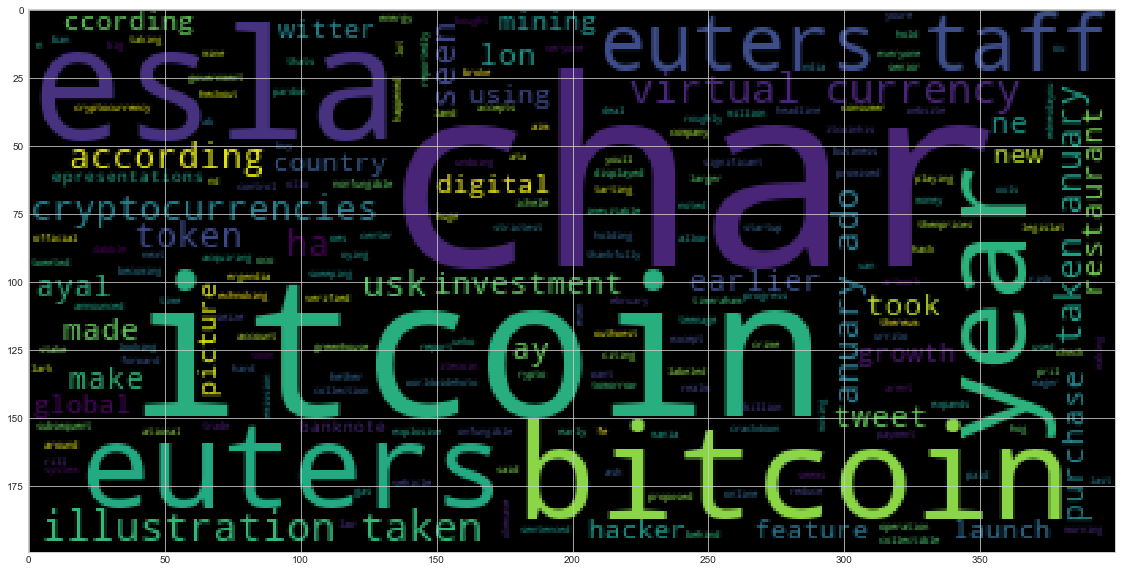

In [23]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
input_btc=' '.join(tokens_btc)
wc_btc = WordCloud().generate(input_btc)
plt.imshow(wc_btc)

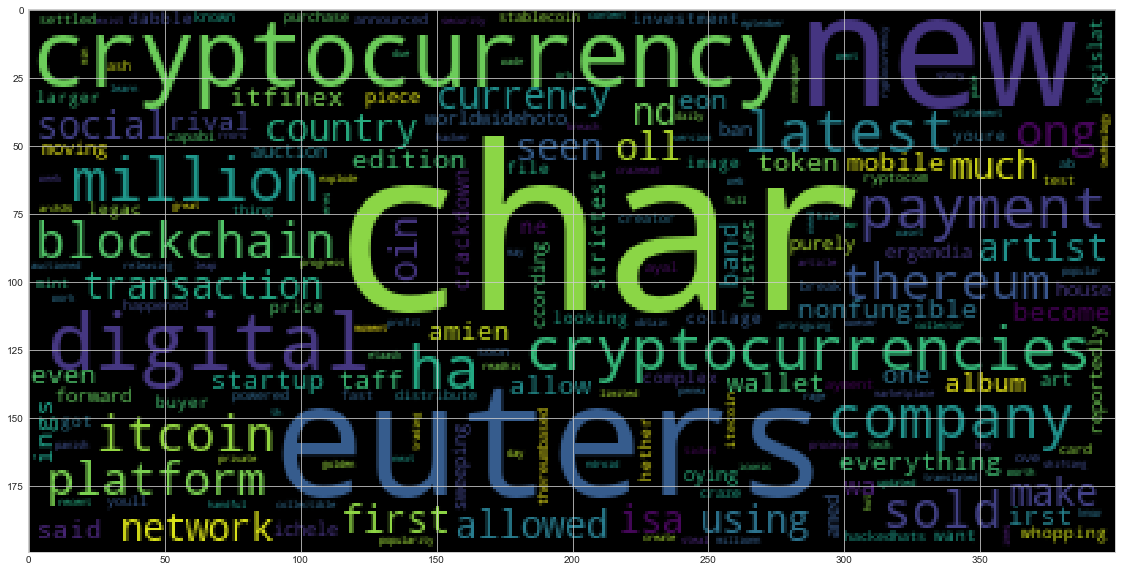

In [24]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
input_eth=' '.join(tokens_eth)
wc_eth = WordCloud().generate(input_eth)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [40]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
cont_btc=' '.join(btc_df["text"])

In [42]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(cont_btc)

# Render NER visualization with displacy
displacy.render(doc, style='ent')
# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [43]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents])

['Bitcoin, Ethereum', 'Bitcoin Cash', 'earlier this year', 'Tesla', 'Bitcoin', 'Tesla', 'Elon Musk', 'Musk', 'Tesla', 'Tesla', 'Bitcoin', 'Elon Musk', 'Wednesday', 'earlier this year', 'roughly $1.5 billion', 'early February', 'SEC', 'National Burrito Day', 'April Fools Day', 'this year', 'tomorrow', 'Pollo Loco', 'Photo', 'Michele Doying', 'India', 'Reuters', 'last years', 'Twitter', 'Graham Ivan Clark', 'Twitters', 'India', 'Reuters', 'this morning', 'millions', 'Funko', 'NFT', 'TokenWave', 'Reuters', 'Dec. 8, 2017', 'Benoit Tessier/Illustration', 'Reuters', 'Reuters', 'Bitcoin', 'January 21, 2021', 'Reuters', 'Reuters', 'Pristina', 'Kosovo', 'June 12, 2018', 'HONG KONG', 'Reuters Breakingviews', '23, 2021', 'Spanish', 'AI', 'Bitcoin', 'The Wise Origin Bitcoin ETF', 'the United States', 'FD Funds Management LLC', 'Reuters', 'Bitcoin', 'U.S.', 'January 8, 2021', 'Dado Ru', 'Reuters', 'Bitcoin', 'U.S.', 'January 27, 2020']


---

### Ethereum NER

In [44]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
cont_eth=' '.join(eth_df["text"])

In [46]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(cont_eth)

# Render NER visualization with displacy
displacy.render(doc, style='ent')

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [47]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents])

['One', 'Photo', 'Michele Doying', 'India', 'Reuters', 'Christies', 'first', '$69 million', '5,000', 'Bitcoin, Ethereum', 'Bitcoin Cash', 'Visa', 'USD Coin', 'Ethereum', 'Crypto.com', 'first', 'Ethereum', 'NFT', 'NFT', 'recent weeks', 'these days', 'Kings', 'NBA', 'millions', 'MetaMask', 'one', 'Ethereum', 'September 2020', 'about $5.7 million', '26, 2021', 'Spanish', 'AI', 'New York Times', 'daily', 'Bitfinex', 'Bitfinex', 'millions of dollars', 'Reuters', 'Meitu', 'Hong Kong', 'China', 'March 24, 2017', 'Bobby Yip', 'HONG KONG', 'Reuters', 'Hong Ko', 'India', 'Reuters', 'Damien Hirst', 'Chris Young', 'Superstar', 'Damien Hirst', 'Reuters', 'BUCHAREST', 'Reuters', 'this month', 'Leon', 'more than $2 million', 'Getty Images', 'Reuters', 'Monday']


---